In [10]:
import torch
from transformers import AutoTokenizer, AutoModel

# HALF PRECISION:
device = "cuda" # the device to load the model onto

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained("distilbert-base-uncased", torch_dtype=torch.float16)

text = "Replace me by any text you'd like."

encoded_input = tokenizer(text, return_tensors='pt').to(device)
model.to(device)

output = model(**encoded_input)
print(output)

BaseModelOutput(last_hidden_state=tensor([[[ 7.4196e-04, -2.6221e-01, -1.0162e-01,  ..., -6.2927e-02,
           2.7563e-01,  3.6963e-01],
         [ 7.2217e-01,  1.6431e-01,  4.0015e-01,  ...,  1.9116e-01,
           4.0356e-01, -5.7587e-02],
         [ 2.8174e-01, -1.7395e-01,  3.9124e-02,  ...,  2.7573e-02,
           1.1877e-01,  9.1357e-01],
         ...,
         [ 6.7920e-01,  7.9529e-02,  8.3643e-01,  ..., -4.9048e-01,
          -2.4976e-01, -2.3511e-01],
         [ 3.8910e-02, -8.1787e-01, -3.3984e-01,  ...,  4.4775e-01,
           9.6924e-02, -2.0227e-01],
         [ 3.5522e-01,  1.9885e-01,  1.7407e-01,  ...,  1.5051e-01,
          -2.3621e-01,  5.5389e-02]]], device='cuda:0', dtype=torch.float16,
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=None)


In [6]:
from transformers import DistilBertTokenizer, DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained("distilbert-base-uncased", torch_dtype=torch.float32)
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

In [4]:
from transformers import DistilBertTokenizer, DistilBertModel

model = DistilBertModel.from_pretrained("distilbert-base-uncased")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)

In [5]:
model.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.37.1",
  "vocab_size": 30522
}

In [6]:
device = 'cpu'
text = "Attention is all you need."

encoded_input = tokenizer(text, return_tensors='pt').to(device)
print(encoded_input)
model.to(device)

output = model(**encoded_input, output_attentions=True)
print(output)

{'input_ids': tensor([[ 101, 3086, 2003, 2035, 2017, 2342, 1012,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
BaseModelOutput(last_hidden_state=tensor([[[-0.0175, -0.0296,  0.0098,  ..., -0.0892,  0.0753,  0.1832],
         [ 0.4965,  0.2875,  0.0740,  ...,  0.1660,  0.2695, -0.4946],
         [-0.1933, -0.1015,  0.4197,  ...,  0.0185, -0.1155,  0.4832],
         ...,
         [ 0.6009,  0.3195,  0.5861,  ..., -0.0425, -0.2081, -0.1199],
         [ 0.6862, -0.0808, -0.4429,  ...,  0.2851, -0.4975, -0.4970],
         [ 0.8849,  0.3167,  0.1134,  ...,  0.1576, -0.6503, -0.3365]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=(tensor([[[[6.8050e-02, 7.1537e-02, 4.8867e-02, 6.4770e-02, 1.2867e-01,
           4.7719e-02, 2.6943e-01, 3.0096e-01],
          [2.2404e-01, 4.7300e-02, 1.3844e-01, 4.7526e-02, 1.5498e-01,
           1.0443e-01, 1.1876e-01, 1.6453e-01],
          [2.4057e-01, 1.3076e-01, 3.2760e-02, 7.6245e-02, 1.5464e-01,
           

In [19]:
output.keys()

odict_keys(['last_hidden_state', 'attentions'])

In [20]:
len(output['attentions'])

6

In [21]:
output['attentions'][0].shape

torch.Size([1, 12, 8, 8])

In [14]:
from transformers import pipeline
from transformers import DistilBertTokenizer, DistilBertModel
import torch

unmasker = pipeline('fill-mask', model='distilbert-base-uncased',device='cuda', torch_dtype=torch.float16)


In [15]:
print(unmasker.model.distilbert.embeddings.word_embeddings.weight.dtype)

torch.float16


In [16]:
unmasker("Hello I'm a [MASK] model.")

[{'score': 0.052922461181879044,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.039637092500925064,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.034843236207962036,
  'token': 2449,
  'token_str': 'business',
  'sequence': "hello i'm a business model."},
 {'score': 0.03470739722251892,
  'token': 2944,
  'token_str': 'model',
  'sequence': "hello i'm a model model."},
 {'score': 0.01807643473148346,
  'token': 11643,
  'token_str': 'modeling',
  'sequence': "hello i'm a modeling model."}]

In [110]:
from transformers import pipeline
from transformers import DistilBertTokenizer, DistilBertModel
import torch

unmasker = pipeline('fill-mask', model='distilbert-base-uncased', device='cpu', torch_dtype=torch.float32)
text = ["Attention is [MASK] you need.", "The cat sat on a [MASK]."]
unmasker(text)

[[{'score': 0.4998205304145813,
   'token': 2035,
   'token_str': 'all',
   'sequence': 'attention is all you need.'},
  {'score': 0.2562854290008545,
   'token': 2054,
   'token_str': 'what',
   'sequence': 'attention is what you need.'},
  {'score': 0.08861085772514343,
   'token': 2673,
   'token_str': 'everything',
   'sequence': 'attention is everything you need.'},
  {'score': 0.05357437953352928,
   'token': 3649,
   'token_str': 'whatever',
   'sequence': 'attention is whatever you need.'},
  {'score': 0.03875176981091499,
   'token': 7249,
   'token_str': 'everywhere',
   'sequence': 'attention is everywhere you need.'}],
 [{'score': 0.2366873323917389,
   'token': 14708,
   'token_str': 'stool',
   'sequence': 'the cat sat on a stool.'},
  {'score': 0.18870970606803894,
   'token': 6847,
   'token_str': 'bench',
   'sequence': 'the cat sat on a bench.'},
  {'score': 0.08329848200082779,
   'token': 3242,
   'token_str': 'chair',
   'sequence': 'the cat sat on a chair.'},
  {'

In [66]:
text = "Attention is [MASK] you need."

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)

encoded_input = tokenizer(text, return_tensors='pt').to('cpu')
print(encoded_input)
out = unmasker.model.distilbert(**encoded_input,  output_attentions=True)
print(out)

{'input_ids': tensor([[ 101, 3086, 2003,  103, 2017, 2342, 1012,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
BaseModelOutput(last_hidden_state=tensor([[[-0.0948,  0.1157,  0.1437,  ..., -0.0643, -0.0389,  0.1412],
         [ 0.3938,  0.2138,  0.0979,  ...,  0.0531,  0.0651, -0.4677],
         [-0.0794, -0.0895,  0.3161,  ...,  0.0144, -0.1718,  0.2745],
         ...,
         [ 0.5164,  0.1794,  0.4209,  ..., -0.0436, -0.1761, -0.1764],
         [ 0.7277,  0.1293, -0.3421,  ...,  0.2486, -0.5508, -0.4044],
         [ 0.5094,  0.3528,  0.5324,  ...,  0.3942, -0.5368, -0.1705]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=(tensor([[[[2.2654e-02, 2.3814e-02, 1.6268e-02, 6.8867e-01, 4.2832e-02,
           1.5886e-02, 8.9693e-02, 1.0019e-01],
          [2.0493e-01, 4.3264e-02, 1.2663e-01, 1.2879e-01, 1.4176e-01,
           9.5518e-02, 1.0863e-01, 1.5049e-01],
          [2.5507e-01, 1.3864e-01, 3.4734e-02, 2.0565e-02, 1.6396e-01,
           

In [26]:
unmasker.tokenizer.mask_token_id

103

In [17]:
print(unmasker.tokenizer.decode([ 101, 3086, 2003,  103, 2017, 2342, 1012,  102]))

[CLS] attention is [MASK] you need. [SEP]


In [31]:
print(unmasker.tokenizer.encode_plus("Attention is [MASK] you need.", return_tensors='pt'))

{'input_ids': tensor([[ 101, 3086, 2003,  103, 2017, 2342, 1012,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


In [8]:
print(unmasker.model)

DistilBertForMaskedLM(
  (activation): GELUActivation()
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.

In [37]:
test_enc = unmasker.tokenizer.encode_plus("Attention is [MASK] you need.", return_tensors='pt')
test_enc_ids = test_enc['input_ids']

In [44]:
mask_id = 103
mask_idx = torch.nonzero(test_enc_ids == mask_id, as_tuple=True)
print(mask_idx, torch.where(test_enc_ids == mask_id))
print(test_enc_ids.shape)
print(test_enc_ids[mask_idx])

(tensor([0]), tensor([3])) (tensor([0]), tensor([3]))
torch.Size([1, 8])
tensor([103])


In [120]:
class PipelineWrapper:
    def __init__(self, pipeline):
        self.pipeline = pipeline
        self.tokenizer = pipeline.tokenizer
        self.model = pipeline.model.distilbert
        self.clf = torch.nn.Sequential(
            pipeline.model.vocab_transform,
            pipeline.model.vocab_layer_norm,
            pipeline.model.vocab_projector
        )
        self.mask_token_id = pipeline.tokenizer.mask_token_id
        
    def decode(self, tokens: list) -> list:
        return self.tokenizer.decode(tokens)
    
    def encode(self, text: str) -> dict:
        return self.tokenizer.encode_plus(text, return_tensors='pt')
    
    def basemodel_predict(self, text: str, output_attentions: bool = True) -> dict:
        encoded_text = self.encode(text)
        outputs = self.model(**encoded_text, output_attentions=output_attentions)
        return outputs, encoded_text
    
    def mask_predict(self, text: str, top_k: int = 5):
        outputs, encoded_text = self.basemodel_predict(text)
        encoded_tokens = encoded_text['input_ids']
        mask_ind =  torch.nonzero(encoded_tokens == self.mask_token_id, as_tuple=True)

        mask_hidden = outputs['last_hidden_state'][mask_ind]
        logits = self.clf(mask_hidden)

        probs = logits.softmax(dim=-1)
        top_k_probs, top_k_ind = probs.topk(top_k)
        top_k_probs = top_k_probs.squeeze()
        top_k_ind = top_k_ind.squeeze()
        top_k_words = [self.decode(token) for token in top_k_ind]
        return {'words': top_k_words, 'tokens': top_k_ind, 'probs': top_k_probs}
        

In [121]:
pw = PipelineWrapper(unmasker)

In [98]:
pw.encode("Attention is [MASK] you need.")

{'input_ids': tensor([[ 101, 3086, 2003,  103, 2017, 2342, 1012,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [99]:
pw.decode([ 101, 3086, 2003,  103, 2017, 2342, 1012,  102])

'[CLS] attention is [MASK] you need. [SEP]'

In [106]:
pw.decode([403, 197, 571, 635, 446])

'[unused398] [unused192] [unused566] [unused630] [unused441]'

In [122]:
pw.mask_predict("Attention is [MASK] you need.")

{'words': ['all', 'what', 'that', 'and', 'one'],
 'tokens': tensor([2035, 2054, 2008, 1998, 2028]),
 'probs': tensor([0.7764, 0.0480, 0.0268, 0.0179, 0.0088], grad_fn=<SqueezeBackward0>)}

In [52]:
import torch

# Example tensor
tensor = torch.tensor([[1, 2, 5],
                       [4, 5, 6],
                       [5, 8, 9]])

tensor2 = torch.arange(0, 3*3*12).reshape(3, 3, -1)
print(f'tensor2 shape: {tensor2.shape} {tensor.shape}')
# Value to create mask for
value = 5

# Create mask using torch.nonzero
mask_idx = torch.nonzero(tensor == value, as_tuple=False)
print(f'mask_idx: \n{mask_idx}')
# Apply mask to tensor
masked_tensor = tensor[mask_idx[:, 0], mask_idx[:, 1]]  # Use mask indices to select values from the tensor

print("Original Tensor:")
print(tensor)
print("\nMasked Tensor:")
print(masked_tensor)


tensor2 shape: torch.Size([3, 3, 12]) torch.Size([3, 3])
mask_idx: 
tensor([[0, 2],
        [1, 1],
        [2, 0]])
Original Tensor:
tensor([[1, 2, 5],
        [4, 5, 6],
        [5, 8, 9]])

Masked Tensor:
tensor([5, 5, 5])


In [58]:
mask_idx.squeeze(-1)

tensor([[0, 2],
        [1, 1],
        [2, 0]])

In [57]:
tensor2

tensor([[[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
         [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
         [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35]],

        [[ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
         [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
         [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71]],

        [[ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
         [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95],
         [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107]]])

In [64]:

tensor2[[0, 2], [0, 0], [2, 1]]

tensor([ 2, 73])

In [65]:
import torch

# Create a tensor
test_enc_ids = torch.tensor([[103, 101, 102, 103]])

# Find the indices of the mask value (103)
mask_idx = torch.nonzero(test_enc_ids == 103, as_tuple=False)

# Simulate hidden states
hidden_states = torch.randn(1, 4, 768)  # Assuming BERT model with hidden size 768

# Get hidden states for mask tokens
mask_hidden_states = hidden_states[:, mask_idx[:, 1], :]

# Print the results
print("Indices of mask value (103):", mask_idx)
print("Simulated hidden states for mask tokens:", mask_hidden_states)


Indices of mask value (103): tensor([[0, 0],
        [0, 3]])
Simulated hidden states for mask tokens: tensor([[[ 0.8787, -1.0632, -1.4103,  ..., -2.6251,  0.6401,  1.3434],
         [-2.1358,  3.2282,  0.5978,  ..., -0.1552,  0.0736,  1.1621]]])


In [74]:
import torch

# Mock model outputs (logits)
model_outputs = {
    "input_ids": torch.tensor([[101, 103, 102, 104]]),  # Input token IDs with mask token 103
    "logits": torch.randn(1, 4, 100)  # Random logits with batch size 1, sequence length 4, and 100 classes
}

# Mock target token IDs
target_ids = torch.tensor([1, 5, 8])

def postprocess(model_outputs, top_k=5, target_ids=None):
    input_ids = model_outputs["input_ids"][0]  # Assuming batch size is 1
    outputs = model_outputs["logits"]

    # Find the indices of the mask token (103)
    masked_index = torch.nonzero(input_ids == 103, as_tuple=False).squeeze(-1)
    print(f'masked index: {masked_index} { torch.nonzero(input_ids == 103, as_tuple=False)}\n')

    # Retrieve the logits for the mask tokens
    print(f'outputs: {outputs.shape}')
    logits = outputs[0, masked_index, :]
    print(f'logits shape after: {logits.shape}\n')

    # Compute softmax probabilities
    probs = logits.softmax(dim=-1)

    # Filter probabilities for target token IDs if provided
    if target_ids is not None:
        probs = probs[..., target_ids]

    # Find top-k probabilities and their corresponding indices
    values, predictions = probs.topk(top_k)

    return values, predictions

# Test the function
values, predictions = postprocess(model_outputs, top_k=2, target_ids=target_ids)

print("Values (Probabilities):")
print(values)

print("\nPredictions (Indices):")
print(predictions)


masked index: tensor([1]) tensor([[1]])

outputs: torch.Size([1, 4, 100])
logits shape after: torch.Size([1, 100])

Values (Probabilities):
tensor([[0.0186, 0.0059]])

Predictions (Indices):
tensor([[1, 2]])


In [83]:
import torch

# Mock model outputs (logits) for multiple inputs
model_outputs = {
    "input_ids": torch.tensor([[101, 103, 102, 104], [101, 103, 102, 105]]),  # Input token IDs with mask token 103
    "logits": torch.randn(2, 4, 100)  # Random logits with batch size 2, sequence length 4, and 100 classes
}


def postprocess(model_outputs, top_k=5):
    input_ids = model_outputs["input_ids"]  # Batch of input token IDs
    outputs = model_outputs["logits"]

    # Find the indices of the mask token (103) for all inputs
    masked_indices = torch.nonzero(input_ids == 103, as_tuple=True)
    print(f'masked indices: {masked_indices}\n')

    # Retrieve the logits for the mask tokens for all inputs
    logits = outputs[masked_indices]
    print(f'outputs shape: {outputs.shape}')
    print(f'logits shape after: {logits.shape}\n')

    # Compute softmax probabilities
    probs = logits.softmax(dim=-1)


    # Find top-k probabilities and their corresponding indices
    values, predictions = probs.topk(top_k, dim=-1)

    return values, predictions

# Test the function
values, predictions = postprocess(model_outputs, top_k=2)

print("Values (Probabilities):")
print(values)

print("\nPredictions (Indices):")
print(predictions)


masked indices: (tensor([0, 1]), tensor([1, 1]))

outputs shape: torch.Size([2, 4, 100])
logits shape after: torch.Size([2, 100])

Values (Probabilities):
tensor([[0.0503, 0.0487],
        [0.0627, 0.0457]])

Predictions (Indices):
tensor([[72, 10],
        [12, 89]])


In [19]:
from src.model import get_pipeline_wrapper

text = "Attention is [MASK] you [MASK]."
#text = "Attention is all you need."
pipe = get_pipeline_wrapper()

In [20]:
outputs = pipe.mask_predict(text)

In [21]:
outputs

{'top_k_words': ['all on to in and', 'are all, and now'],
 'top_k_tokens': tensor([[2035, 2006, 2000, 1999, 1998],
         [2024, 2035, 1010, 1998, 2085]]),
 'top_k_probs': tensor([[0.3008, 0.0549, 0.0499, 0.0419, 0.0379],
         [0.0616, 0.0472, 0.0451, 0.0297, 0.0297]], grad_fn=<SqueezeBackward0>),
 'input_tokens': tensor([ 101, 3086, 2003,  103, 2017,  103, 1012,  102]),
 'input_words': ['[CLS]',
  'attention',
  'is',
  '[MASK]',
  'you',
  '[MASK]',
  '.',
  '[SEP]'],
 'outputs': BaseModelOutput(last_hidden_state=tensor([[[-0.0749,  0.1383,  0.1504,  ..., -0.0611,  0.0200,  0.1531],
          [ 0.4114,  0.2360,  0.1341,  ...,  0.0808,  0.1893, -0.3933],
          [ 0.0627, -0.0614,  0.3356,  ...,  0.0577,  0.0224,  0.2426],
          ...,
          [ 0.3369,  0.1066,  0.3079,  ...,  0.1093,  0.1603, -0.0771],
          [ 0.7352,  0.1994, -0.2528,  ...,  0.2207, -0.4617, -0.3988],
          [ 0.5065,  0.4096,  0.4948,  ...,  0.3736, -0.4762, -0.1637]]]), hidden_states=None, atte

In [5]:
outputs

{'top_k_words': ['all', 'what', 'that', 'and', 'one'],
 'top_k_tokens': tensor([2035, 2054, 2008, 1998, 2028]),
 'top_k_probs': tensor([0.7764, 0.0480, 0.0268, 0.0179, 0.0088], grad_fn=<SqueezeBackward0>),
 'input_tokens': tensor([ 101, 3086, 2003,  103, 2017, 2342, 1012,  102]),
 'input_words': ['[CLS]',
  'attention',
  'is',
  '[MASK]',
  'you',
  'need',
  '.',
  '[SEP]'],
 'outputs': BaseModelOutput(last_hidden_state=tensor([[[-0.0948,  0.1157,  0.1437,  ..., -0.0643, -0.0389,  0.1412],
          [ 0.3938,  0.2138,  0.0979,  ...,  0.0531,  0.0651, -0.4677],
          [-0.0794, -0.0895,  0.3161,  ...,  0.0144, -0.1718,  0.2745],
          ...,
          [ 0.5164,  0.1794,  0.4209,  ..., -0.0436, -0.1761, -0.1764],
          [ 0.7277,  0.1293, -0.3421,  ...,  0.2486, -0.5508, -0.4044],
          [ 0.5094,  0.3528,  0.5324,  ...,  0.3942, -0.5368, -0.1705]]]), hidden_states=None, attentions=(tensor([[[[2.2654e-02, 2.3814e-02, 1.6268e-02, 6.8867e-01, 4.2832e-02,
            1.5886e-02

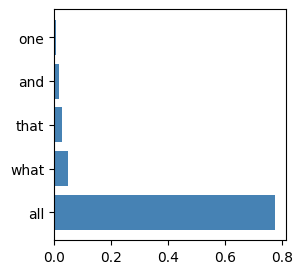

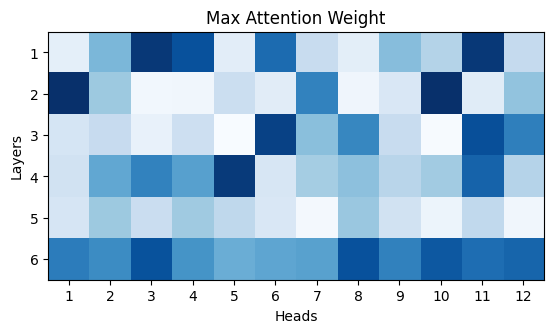

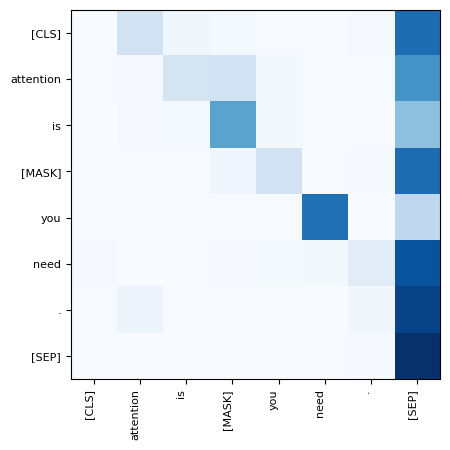

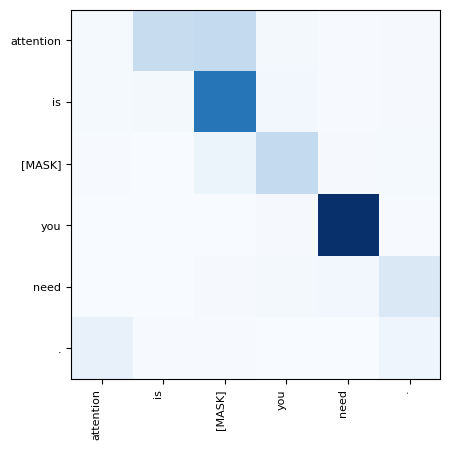

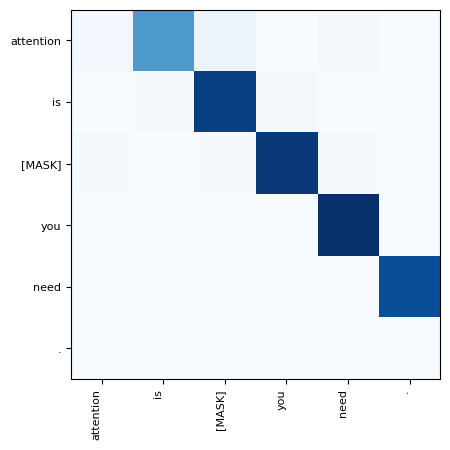

In [18]:
import matplotlib.pyplot as plt 
import numpy as np

import torch


def remove_special_tokens(outputs):
    attention_weights = np.stack([layer_weights.detach().cpu().numpy().squeeze() for layer_weights in outputs['outputs']['attentions']])
    input_tokens = outputs['input_tokens'].cpu().numpy()
    special_tokens = {101, 102}
    # Create a mask to identify special tokens
    mask = np.isin(input_tokens, list(special_tokens))
    # Negate the mask to exclude special tokens
    attention_weights_no_special = attention_weights[:, :, ~mask, :]
    attention_weights_no_special = attention_weights_no_special[:, :, :, ~mask]
    return attention_weights_no_special, ~mask


def plot_all_attentions(outputs, include_special_tokens=True):
    if include_special_tokens:
        attention_weights = np.stack([layer_weights.detach().cpu().numpy().squeeze() for layer_weights in outputs['outputs']['attentions']])
    else:
        attention_weights, _ = remove_special_tokens(outputs)
    max_attentions = np.max(attention_weights, axis=(-1, -2))
    plt.imshow(max_attentions, cmap='Blues')
    plt.yticks(range(attention_weights.shape[0]), range(1, attention_weights.shape[0]+1))
    plt.xticks(range(attention_weights.shape[1]), range(1, attention_weights.shape[1]+1))
    plt.xlabel('Heads')
    plt.ylabel('Layers')
    plt.title('Max Attention Weight')
    plt.show()

def plot_attention(outputs, layer, head, include_special_tokens=True):
    attention_weights = np.stack([layer_weights.detach().cpu().numpy().squeeze() for layer_weights in outputs['outputs']['attentions']])[layer][head]
    words = np.array(outputs['input_words'])

    if not include_special_tokens:
        attention_weights, mask = remove_special_tokens(outputs)
        attention_weights = attention_weights[layer][head]
        words = words[mask]

    plt.imshow(attention_weights, cmap='Blues')
    plt.xticks(range(len(words)), words, rotation=90, ha='right', fontsize=8)
    plt.yticks(range(len(words)), words, rotation=0, ha='right', fontsize=8)
    plt.show()

def plot_top_k(outputs):
    top_k_words = np.array(outputs['top_k_words'])
    top_k_probs = outputs['top_k_probs'].detach().cpu().numpy()
    if top_k_words.ndim > 1:
        n_plots = top_k_words.shape[0]
    else:
        top_k_probs = np.expand_dims(top_k_probs, 0)
        top_k_words = np.expand_dims(top_k_words, 0)
        n_plots = 1
    
    fig, ax = plt.subplots(n_plots, figsize=(3, 3))
    if n_plots == 1:
        ax.barh(top_k_words[0], top_k_probs[0], align='center', color='steelblue')
    else:
        for i in range(n_plots):
            ax[i].barh(top_k_probs[i], top_k_words[i], align='center')
    plt.show()

remove_special_tokens(outputs)
plot_top_k(outputs)
plot_all_attentions(outputs, include_special_tokens=False)
plot_attention(outputs, 3, 2, include_special_tokens=True)
plot_attention(outputs, 3, 2, include_special_tokens=False)
plot_attention(outputs, 0, 10, include_special_tokens=False)



attention shape: (6, 12, 5, 5)


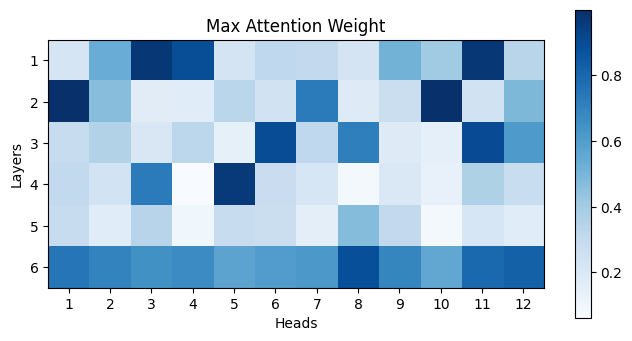

attention weights shape: (8, 8)


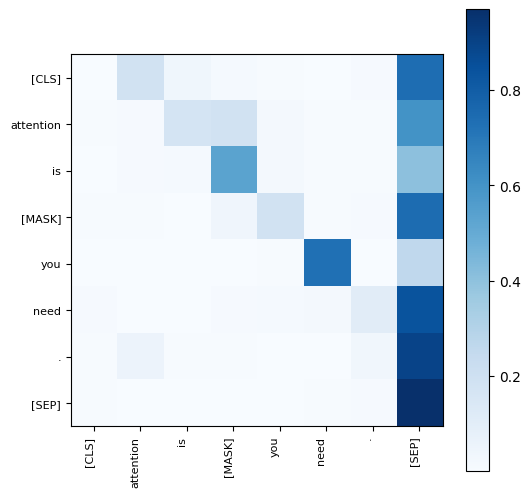

attention weights shape: (5, 5)


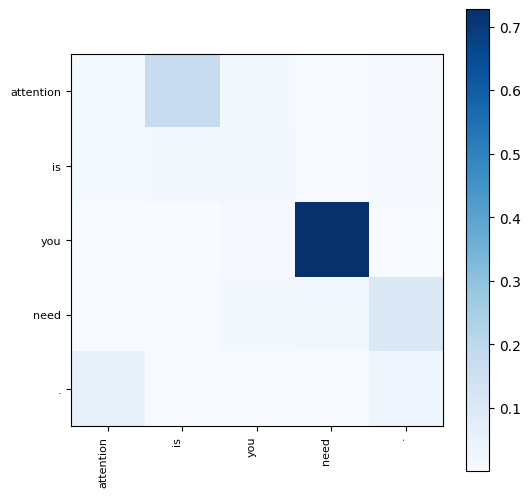

attention weights shape: (5, 5)


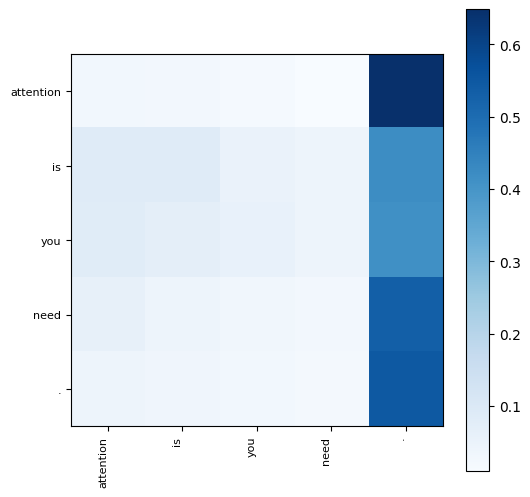

In [103]:
import matplotlib.pyplot as plt 
import numpy as np

def remove_special_tokens(outputs):
    attention_weights = np.stack([layer_weights.detach().cpu().numpy().squeeze() for layer_weights in outputs['outputs']['attentions']])
    input_tokens = outputs['input_tokens'].cpu().numpy()
    special_tokens = {101, 102, 103}
    mask = np.isin(input_tokens, list(special_tokens))
    attention_weights_no_special = attention_weights[:, :, ~mask, :]
    attention_weights_no_special = attention_weights_no_special[:, :, :, ~mask]
    return attention_weights_no_special, ~mask

def plot_all_attentions(outputs, include_special_tokens=True):
    if include_special_tokens:
        attention_weights = np.stack([layer_weights.detach().cpu().numpy().squeeze() for layer_weights in outputs['outputs']['attentions']])
    else:
        attention_weights, _ = remove_special_tokens(outputs)
    print(f'attention shape: {attention_weights.shape}')
    max_attentions = np.max(attention_weights, axis=(-1, -2))
    plt.figure(figsize=(8, 4))
    plt.imshow(max_attentions, cmap='Blues')
    plt.colorbar()  # Add colorbar
    plt.yticks(range(attention_weights.shape[0]), range(1, attention_weights.shape[0]+1))
    plt.xticks(range(attention_weights.shape[1]), range(1, attention_weights.shape[1]+1))
    plt.xlabel('Heads')
    plt.ylabel('Layers')
    plt.title('Max Attention Weight')
    plt.show()

def plot_attention(outputs, layer, head, include_special_tokens=True):
    attention_weights = np.stack([layer_weights.detach().cpu().numpy().squeeze() for layer_weights in outputs['outputs']['attentions']])[layer][head]
    words = np.array(outputs['input_words'])

    if not include_special_tokens:
        attention_weights, mask = remove_special_tokens(outputs)
        attention_weights = attention_weights[layer][head]
        words = words[mask]

    print(f'attention weights shape: {attention_weights.shape}')
    plt.figure(figsize=(4, 4))
    plt.imshow(attention_weights, cmap='Blues')
    plt.colorbar()  # Add colorbar
    plt.xticks(range(len(words)), words, rotation=90, ha='right', fontsize=8)
    plt.yticks(range(len(words)), words, rotation=0, ha='right', fontsize=8)
    plt.show()

remove_special_tokens(outputs)
plot_all_attentions(outputs, include_special_tokens=False)
plot_attention(outputs, 3, 2, include_special_tokens=True)
plot_attention(outputs, 3, 2, include_special_tokens=False)
plot_attention(outputs, 5, 2, include_special_tokens=False)


In [94]:
import numpy as np
import plotly.graph_objects as go

def remove_special_tokens(outputs):
    attention_weights = np.stack([layer_weights.detach().cpu().numpy().squeeze() for layer_weights in outputs['outputs']['attentions']])
    input_tokens = outputs['input_tokens'].cpu().numpy()
    special_tokens = {101, 102, 103}
    mask = np.isin(input_tokens, list(special_tokens))
    attention_weights_no_special = attention_weights[:, :, ~mask, :]
    attention_weights_no_special = attention_weights_no_special[:, :, :, ~mask]
    return attention_weights_no_special, ~mask

def plot_all_attentions(outputs, include_special_tokens=True):
    if include_special_tokens:
        attention_weights = np.stack([layer_weights.detach().cpu().numpy().squeeze() for layer_weights in outputs['outputs']['attentions']])
    else:
        attention_weights, _ = remove_special_tokens(outputs)
        
    max_attentions = np.max(attention_weights, axis=(-1, -2))
    fig = go.Figure(data=go.Heatmap(z=max_attentions, colorscale='Blues'))
    fig.update_layout(
        title='Max Attention Weight',
        xaxis_title='Heads',
        yaxis_title='Layers',
        yaxis_scaleanchor="x",
        height=500,  # Adjust figure height to achieve square aspect ratio
        width=500    # Adjust figure width to achieve square aspect ratio
    )
    fig.show()

def plot_attention(outputs, layer, head, include_special_tokens=True):
    attention_weights = np.stack([layer_weights.detach().cpu().numpy().squeeze() for layer_weights in outputs['outputs']['attentions']])[layer][head]
    words = np.array(outputs['input_words'])

    if not include_special_tokens:
        attention_weights, mask = remove_special_tokens(outputs)
        attention_weights = attention_weights[layer][head]
        words = words[mask]

    fig = go.Figure(data=go.Heatmap(z=attention_weights, colorscale='Blues'))
    fig.update_layout(
        title='Attention Weights',
        xaxis=dict(
            tickmode='array',
            tickvals=list(range(len(words))),
            ticktext=words,
            tickangle=90,
            title='Words'
        ),
        yaxis=dict(
            tickmode='array',
            tickvals=list(range(len(words))),
            ticktext=words,
            title='Words'
        ),
        yaxis_scaleanchor="x",
        height=500,  # Adjust figure height to achieve square aspect ratio
        width=500    # Adjust figure width to achieve square aspect ratio
    )
    fig.show()

remove_special_tokens(outputs)
plot_all_attentions(outputs, include_special_tokens=False)
plot_attention(outputs, 3, 2, include_special_tokens=True)
plot_attention(outputs, 3, 2, include_special_tokens=False)
plot_attention(outputs, 5, 2, include_special_tokens=False)



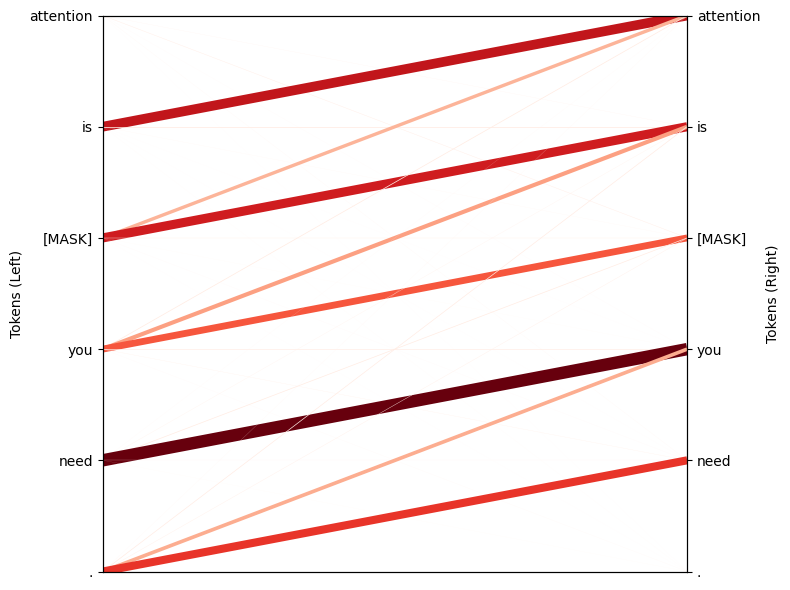

In [72]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

def plot_attention_lines(outputs, layer, head, include_special_tokens=True):
    attention_weights = outputs['outputs']['attentions'][layer][0, head, :].detach().cpu().numpy()
    words = outputs['input_words']

    if not include_special_tokens:
        attention_weights = attention_weights[1:-1, 1:-1]
        words = words[1:-1]

    #print(f'attention weights shape: {attention_weights.shape}')
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words[::-1], rotation=0)  # Reverse the order of tokens on the left
    
    # Add token labels on the right side
    ax2 = ax.twinx()
    ax2.set_yticks(range(len(words)))
    ax2.set_yticklabels(words[::-1], rotation=0, ha='left')
    ax2.set_ylabel('Tokens (Right)', fontsize=10)
    
    lines = []
    for from_idx in range(len(words)):
        for to_idx in range(len(words)):
            weight = attention_weights[from_idx, to_idx]
            if weight > 0:
                line = [(0, len(words)-1 - from_idx), (1, len(words)-1 -to_idx)]
                #print(line, weight)
                lines.append(line)

    lc = LineCollection(lines, cmap='Reds', linewidths=np.array([10 * weight for weight in attention_weights.flatten() if weight > 0]))
    lc.set_array(attention_weights.flatten())
    ax.add_collection(lc)
    
    ax.set_ylabel('Tokens (Left)', fontsize=10)
    
    # Set y-limit to 10
    #ax.set_ylim(0, 10)
    #ax2.set_ylim(0, 10)
    # Remove x-axis and its ticks
    ax.set_xticks([])
    ax.set_xlabel('')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_attention_lines(outputs, 0, 3, include_special_tokens=False)





In [27]:
import plotly.graph_objects as go
import numpy as np

def plot_attention_sankey(outputs, layer, head, include_special_tokens=True):
    attention_weights = outputs['outputs']['attentions'][layer][0, head, :].detach().cpu().numpy()
    words = outputs['input_words']

    if not include_special_tokens:
        attention_weights = attention_weights[1:-1, 1:-1]
        words = words[1:-1]

    num_words = len(words)

    # Create labels for nodes
    labels_left = [f'left_{i}' for i in range(num_words)]
    labels_right = [f'right_{i}' for i in range(num_words)]

    # Create flows
    flows = []
    for i in range(num_words):
        for j in range(num_words):
            flows.append((i, j + num_words, attention_weights[i, j]))

    # Create Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels_left + labels_right,
            color="blue"
        ),
        link=dict(
            source=[flow[0] for flow in flows],
            target=[flow[1] for flow in flows],
            value=[flow[2] for flow in flows]
        )
    )])

    fig.update_layout(title_text='Attention Weights Sankey Diagram', font_size=10)
    fig.show()

# Example usage
plot_attention_sankey(outputs, 4, 2, include_special_tokens=False)






In [ ]:
# Plot attention
fig, axs = plt.subplots(nrows=len(attention), ncols=1, figsize=(10, 5*len(attention)))
for i, att in enumerate(attention):
        axs[i].set_title(f'Layer {i+1} Attention')
        axs[i].set_xlabel('From Token')
        axs[i].set_ylabel('To Token')
        axs[i].set_xticks(np.arange(len(tokenized_input['input_ids'])))
        axs[i].set_yticks(np.arange(len(tokenized_input['input_ids'])))
        axs[i].set_xticklabels(tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'][0]))
        axs[i].set_yticklabels(tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'][0]))
        plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
        
        # Draw lines with widths proportional to attention weights
        for from_idx in range(att.shape[0]):
            for to_idx in range(att.shape[1]):
                weight = att[from_idx, to_idx]
                if weight > 0:
                    axs[i].plot([from_idx, to_idx], [from_idx, to_idx], color='black', alpha=weight, linewidth=5*weight)
    
    plt.tight_layout()
    plt.show()

In [18]:
import plotly.graph_objects as go
import torch
import numpy as np
import plotly.express as px
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertModel

def visualize_attention(text, layer_idx=0, head_idx=0, model_name='distilbert-base-uncased'):
    # Load pre-trained model and tokenizer
    tokenizer = DistilBertTokenizer.from_pretrained(model_name)
    model = DistilBertModel.from_pretrained(model_name)
    
    # Tokenize input text
    tokenized_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    # Get attention weights
    with torch.no_grad():
        outputs = model(**tokenized_input, output_attentions=True)
        attention = outputs.attentions[0][layer_idx][head_idx]
        print(f'attention shapes: {attention.shape}')

    # Convert attention tensor to numpy array
    attention = attention.squeeze().cpu().numpy()
    
    # Prepare data for Sankey diagram
    node_labels = [tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'][0][i].item()) for i in range(len(tokenized_input['input_ids'][0]))]
    link_labels = []
    source = []
    target = []
    value = []
    for from_idx in range(attention.shape[0]):
        for to_idx in range(attention.shape[1]):
            weight = attention[from_idx, to_idx]
            if weight > 0:
                source.append(from_idx)
                target.append(len(node_labels) + to_idx)
                value.append(weight)
                link_labels.append(f'{node_labels[from_idx]} -> {node_labels[to_idx]}')
    
    node_labels += node_labels#[f'Masked Token {i}' for i in range(attention.shape[1])]
    
    # Create Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
          pad=15,
          thickness=20,
          line=dict(color="black", width=0.5),
          label=node_labels,
          color="blue"
        ),
        link=dict(
          source=source,
          target=target,
          value=value,
          label=link_labels
      ))])
    
    fig.update_layout(title_text='Attention Visualization (Sankey Diagram)', font_size=10)
    fig.show()

# Example usage:
text = "The cat sat on the mat."
visualize_attention(text, layer_idx=0, head_idx=0)






attention shapes: torch.Size([9, 9])


In [17]:
import plotly.graph_objects as go
import torch
from transformers import DistilBertTokenizer, DistilBertModel
import numpy as np

def visualize_attention(text, layer_idx=0, head_idx=0, model_name='distilbert-base-uncased', attention_threshold=0.5):
    # Load pre-trained model and tokenizer
    tokenizer = DistilBertTokenizer.from_pretrained(model_name)
    model = DistilBertModel.from_pretrained(model_name)
    
    # Tokenize input text
    tokenized_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    # Get attention weights
    with torch.no_grad():
        outputs = model(**tokenized_input, output_attentions=True)
        attention = outputs.attentions[layer_idx].squeeze()[head_idx]

    # Convert attention tensor to numpy array
    attention = attention.cpu().numpy()

    # Prepare data for Sankey diagram
    node_labels = [tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'][0][i].item()) for i in range(len(tokenized_input['input_ids'][0]))]
    link_labels = []
    source = []
    target = []
    value = []

    # Get top attention values based on threshold
    attention_flat = attention.flatten()
    sorted_indices = np.argsort(attention_flat)[::-1]  # Sort indices in descending order
    threshold_index = int(len(sorted_indices) * attention_threshold)
    top_indices = sorted_indices[:threshold_index]

    for idx in top_indices:
        from_idx = idx // attention.shape[1]
        to_idx = idx % attention.shape[1]
        weight = attention[from_idx, to_idx] / attention[from_idx].sum()  # Normalize attention values per source token

        # Add source and target nodes
        source.append(from_idx)
        target.append(from_idx + len(node_labels))

        value.append(weight)
        link_labels.append(f'{node_labels[from_idx]} -> {node_labels[to_idx]}')

    # Append the masked tokens to the node labels
    node_labels += [f'Masked Token {i}' for i in range(attention.shape[1])]

    # Create Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=node_labels,
            color="blue"
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            label=link_labels,
            color="red"  # Set color of connections as red
        ))])

    fig.update_layout(title_text='Attention Visualization (Sankey Diagram)', font_size=10, width=800, height=600)  # Specify plot size
    fig.show()

# Example usage:
text = "The cat sat on the mat."
visualize_attention(text, layer_idx=2, head_idx=2)






In [104]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        # Считываем данные - делаем split - делаем map из string в int - переводим в лист
        numbers = list(map(int, file.read().split()))
    return numbers

def write_answer(file_path, answer_1, answer_2):
    with open(file_path, 'w') as file:
        file.write(str(answer_1) + '\n' + str(answer_2))

def solution(file_path):
    numbers = load_data(file_path)

    # Делаем + бесконечность (бесконечно большое число)
    min_sum = float('inf')
    # Количество правильных пар пока равно 0
    correct_sums = 0
    # Выбираем первое число:
    for i in range(len(numbers)):
        # Выбираем второе число:
        for j in range(i+1, len(numbers)):
            if i == len(numbers):
                print(i, j, 'error')
            # Считаем сумму
            sum_i_j = numbers[i] + numbers[j]
            # Считаем произведение
            prod_i_j = numbers[i]*numbers[j]
            # Если сумма кратна 10 И произведение кратно 7
            if (sum_i_j % 10 == 0) and (prod_i_j % 7 == 0):
                # Прибовляем 1 к счетчику пар
                correct_sums += 1
                # Если сумма меньше минимальной суммы
                if sum_i_j < min_sum:
                    # обновляем минимальную сумму
                    min_sum = sum_i_j
                    print(f'i: {i} j: {j} num_i: {numbers[i]} num_j: {numbers[j]} sum: {sum_i_j} prod: {prod_i_j}')
    print(f'Кол-во пар: {correct_sums} минимальная сумма: {min_sum}')
    write_answer('answer.txt', correct_sums, min_sum)

solution('/home/mikhail/Downloads/1.txt')

i: 0 j: 27 num_i: 5612 num_j: 378 sum: 5990 prod: 2121336
i: 0 j: 62 num_i: 5612 num_j: 168 sum: 5780 prod: 942816
i: 0 j: 655 num_i: 5612 num_j: 28 sum: 5640 prod: 157136
i: 2 j: 35 num_i: 1115 num_j: 1085 sum: 2200 prod: 1209775
i: 2 j: 649 num_i: 1115 num_j: 735 sum: 1850 prod: 819525
i: 2 j: 778 num_i: 1115 num_j: 525 sum: 1640 prod: 585375
i: 2 j: 850 num_i: 1115 num_j: 315 sum: 1430 prod: 351225
i: 2 j: 4398 num_i: 1115 num_j: 245 sum: 1360 prod: 273175
i: 5 j: 423 num_i: 268 num_j: 392 sum: 660 prod: 105056
i: 5 j: 564 num_i: 268 num_j: 322 sum: 590 prod: 86296
i: 5 j: 1740 num_i: 268 num_j: 112 sum: 380 prod: 30016
i: 5 j: 7281 num_i: 268 num_j: 42 sum: 310 prod: 11256
i: 12 j: 92 num_i: 84 num_j: 186 sum: 270 prod: 15624
i: 12 j: 619 num_i: 84 num_j: 26 sum: 110 prod: 2184
i: 12 j: 4570 num_i: 84 num_j: 16 sum: 100 prod: 1344
i: 12 j: 4866 num_i: 84 num_j: 6 sum: 90 prod: 504
i: 655 j: 1303 num_i: 28 num_j: 22 sum: 50 prod: 616
i: 655 j: 6155 num_i: 28 num_j: 2 sum: 30 prod: 5

In [105]:
f = open('/home/mikhail/Downloads/1.txt')
sp = []
count = 0
sp1 = []
for i in f:
    sp.append(int(i))

for m in range(len(sp) - 1):
    for g in range(m +1, len(sp)):
        if (sp[m] + sp[g]) % 10 == 0 and (sp[m] * sp[g]) % 7 == 0:
            count += 1
            sp1.append(sp[m]+sp[g])
print(count)
b = min(sp1)
print(b)

1314494
10


In [8]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        numbers = list(map(int, file.read().split()))
    return numbers

def write_answer(file_path, answer_1, answer_2):
    with open(file_path, 'w') as file:
        file.write(str(answer_1) + '\n' + str(answer_2))

def solution2(file_path):
    numbers = load_data(file_path)
    count_div_by_10 = sum(1 for num in numbers if num % 10 == 0)
    count_div_by_7 = sum(1 for num in numbers if num % 7 == 0)

    min_sum = float('inf')
    correct_sums = 0

    for num in numbers:
        if num % 10 != 0:  # No need to consider numbers divisible by 10
            complement = 10 - (num % 10)
            complement_count = sum(1 for other_num in numbers if other_num == complement)
            valid_pairs_count = complement_count * count_div_by_7
            correct_sums += valid_pairs_count

            if valid_pairs_count > 0:
                min_sum = min(min_sum, complement + num)

    print(correct_sums, min_sum)

solution2('/home/mikhail/Downloads/1.txt')


15453215 10


In [5]:
solution('/home/mikhail/Downloads/1.txt')

i: 0 j: 27 num_i: 5612 num_j: 378 sum: 5990 prod: 2121336
i: 0 j: 62 num_i: 5612 num_j: 168 sum: 5780 prod: 942816
i: 0 j: 655 num_i: 5612 num_j: 28 sum: 5640 prod: 157136
i: 2 j: 35 num_i: 1115 num_j: 1085 sum: 2200 prod: 1209775
i: 2 j: 649 num_i: 1115 num_j: 735 sum: 1850 prod: 819525
i: 2 j: 778 num_i: 1115 num_j: 525 sum: 1640 prod: 585375
i: 2 j: 850 num_i: 1115 num_j: 315 sum: 1430 prod: 351225
i: 2 j: 4398 num_i: 1115 num_j: 245 sum: 1360 prod: 273175
i: 5 j: 423 num_i: 268 num_j: 392 sum: 660 prod: 105056
i: 5 j: 564 num_i: 268 num_j: 322 sum: 590 prod: 86296
i: 5 j: 1740 num_i: 268 num_j: 112 sum: 380 prod: 30016
i: 5 j: 7281 num_i: 268 num_j: 42 sum: 310 prod: 11256
i: 12 j: 92 num_i: 84 num_j: 186 sum: 270 prod: 15624
i: 12 j: 619 num_i: 84 num_j: 26 sum: 110 prod: 2184
i: 12 j: 4570 num_i: 84 num_j: 16 sum: 100 prod: 1344
i: 12 j: 4866 num_i: 84 num_j: 6 sum: 90 prod: 504
i: 655 j: 1303 num_i: 28 num_j: 22 sum: 50 prod: 616
i: 655 j: 6155 num_i: 28 num_j: 2 sum: 30 prod: 5

(1314494, 10)